<a href="https://colab.research.google.com/github/MLGus/yolo/blob/main/Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-24 Python-3.11.11 torch-2.5.1+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Saving 4782359641_ec671e3141_z.jpg to 4782359641_ec671e3141_z.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Imagem processada:


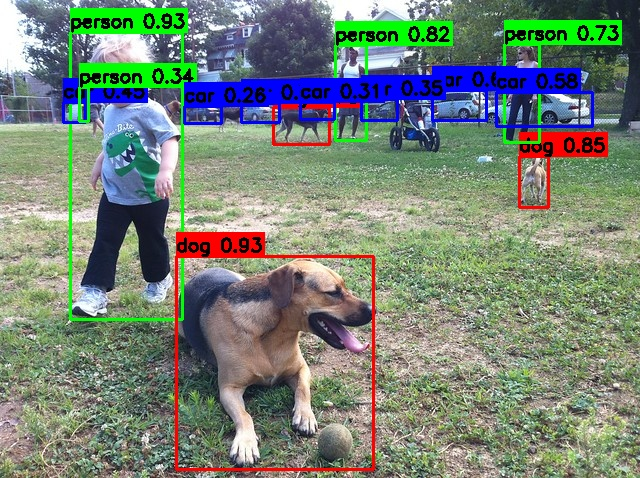

Imagem processada salva como: imagem_processada.jpg


In [2]:
# Instalar dependências necessárias
!pip install torch torchvision
!pip install opencv-python
!pip install matplotlib

# Importar bibliotecas
import torch
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display, Image

# Carregar o modelo pré-treinado YOLOv5
modelo = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 'yolov5s' é o modelo pequeno do YOLOv5

# Função para detectar objetos em uma imagem e aplicar bordas e labels
def detectar_objetos(caminho_imagem):
    # Carregar a imagem
    imagem = cv2.imread(caminho_imagem)

    # Converter a imagem para RGB (OpenCV carrega em BGR por padrão)
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

    # Fazer a detecção de objetos
    resultados = modelo(imagem_rgb)

    # Obter as detecções
    deteccoes = resultados.pandas().xyxy[0]  # Detecções no formato DataFrame

    # Definir cores para cada classe
    cores = {
        'person': (0, 255, 0),  # Verde para pessoas
        'car': (255, 0, 0),     # Azul para carros
        'dog': (0, 0, 255)       # Vermelho para cachorros
    }

    # Filtrar apenas pessoas, carros e cachorros
    classes_desejadas = ['person', 'car', 'dog']
    deteccoes_filtradas = deteccoes[deteccoes['name'].isin(classes_desejadas)]

    # Desenhar caixas delimitadoras e labels na imagem
    for _, deteccao in deteccoes_filtradas.iterrows():
        xmin, ymin, xmax, ymax = int(deteccao['xmin']), int(deteccao['ymin']), int(deteccao['xmax']), int(deteccao['ymax'])
        nome_classe = deteccao['name']
        confianca = deteccao['confidence']

        # Cor da caixa (em BGR)
        cor = cores.get(nome_classe, (0, 255, 0))  # Verde padrão se a classe não estiver no dicionário

        # Desenhar a caixa delimitadora
        cv2.rectangle(imagem, (xmin, ymin), (xmax, ymax), cor, 2)

        # Texto da label
        texto = f"{nome_classe} {confianca:.2f}"

        # Tamanho da fonte e espessura
        fonte = cv2.FONT_HERSHEY_SIMPLEX
        escala_fonte = 0.6
        espessura = 2

        # Tamanho do texto
        (largura_texto, altura_texto), _ = cv2.getTextSize(texto, fonte, escala_fonte, espessura)

        # Desenhar um fundo para o texto
        cv2.rectangle(imagem, (xmin, ymin - altura_texto - 10), (xmin + largura_texto, ymin), cor, -1)

        # Desenhar o texto
        cv2.putText(imagem, texto, (xmin, ymin - 5), fonte, escala_fonte, (0, 0, 0), espessura)

    # Salvar a imagem processada
    caminho_imagem_processada = 'imagem_processada.jpg'
    cv2.imwrite(caminho_imagem_processada, imagem)

    # Exibir a imagem processada em um "pop-up" no Colab
    print("Imagem processada:")
    display(Image(filename=caminho_imagem_processada))

    print(f"Imagem processada salva como: {caminho_imagem_processada}")

# Upload da imagem
uploaded = files.upload()

# Verificar se uma imagem foi carregada
if uploaded:
    # Obter o nome do arquivo carregado
    nome_arquivo = next(iter(uploaded))

    # Executar a detecção de objetos na imagem carregada
    detectar_objetos(nome_arquivo)
else:
    print("Nenhuma imagem foi carregada.")